In [1]:
!git clone https://github.com/pondelion/FinAppModel.git

Cloning into 'FinAppModel'...
remote: Enumerating objects: 290, done.
remote: Counting objects: 100% (290/290), done.
remote: Compressing objects: 100% (171/171), done.
remote: Total 290 (delta 117), reused 247 (delta 80), pack-reused 0
Receiving objects: 100% (290/290), 60.28 KiB | 5.02 MiB/s, done.
Resolving deltas: 100% (117/117), done.


In [2]:
ls

FinAppModel/  sample_data/


In [3]:
%cd FinAppModel/

/content/FinAppModel


In [4]:
!chmod u+x extra_install.sh

In [ ]:
!sudo ./extra_install.sh

In [ ]:
!pip install cython
!pip install pandas
!pip install overrides
!pip install scikit-learn
!pip install torch
!pip install pytest
!pip install optuna
!pip install lightgbm
!pip install catboost
!pip install boto3
!pip install fsspec
!pip install s3fs

In [7]:
!pip install Ta-Lib

     |████████████████████████████████| 276kB 4.2MB/s 
  Created wheel for Ta-Lib: filename=TA_Lib-0.4.19-cp36-cp36m-linux_x86_64.whl size=1437805 sha256=a781ff9a6b9b2721f8f054b69937ab26723b8ac4081a527c025fa479d371d005
  Stored in directory: /root/.cache/pip/wheels/a3/f6/12/3d1ccd06caadd8fa47e016991dd0d27f1163bb260f1854e2ff
Successfully built Ta-Lib


In [8]:
!pip install -e .

Obtaining file:///content/FinAppModel
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Running setup.py develop for fin-app-model


-> restart kernel

In [1]:
%cd /content/FinAppModel/

/content/FinAppModel


In [5]:
!python -m pytest tests -s

============================= test session starts ==============================
platform linux -- Python 3.6.9, pytest-3.6.4, py-1.10.0, pluggy-0.7.1
rootdir: /content/FinAppModel, inifile:
plugins: typeguard-2.7.1
collecting 3 items                                                             /usr/local/lib/python3.6/dist-packages/requests/__init__.py:91: RequestsDependencyWarning:

urllib3 (1.26.3) or chardet (3.0.4) doesn't match a supported version!

collected 7 items                                                              

tests/test_feature.py             ohlc_testdata_close  ...  ohlc_testdata_month
2015-04-06            -6.572115  ...                    4
2015-04-08            -5.066881  ...                    4
2015-04-10            -6.180463  ...                    4
2015-04-11            -5.143026  ...                    4
2015-04-13            -1.995765  ...                    4
...                         ...  ...                  ...
2020-01-23            21.481592 

In [2]:
from fin_app_models.model.structured_base.regression import (
    LinearRegression,
    RidgeRegression,
    LassoRegression,
)
from fin_app_models.model.structured_base.timeseries_model import (
    TrendLinearRegression,
)

/usr/local/lib/python3.6/dist-packages/requests/__init__.py:91: RequestsDependencyWarning:

urllib3 (1.26.3) or chardet (3.0.4) doesn't match a supported version!



In [3]:
from fin_app_models.dataset.stock import Stock

In [4]:
Stock(code=4719).data

INFO : 2021-02-23 01:43:45,642 : [CSVCachedData] Downloading s3://fin-app/stockprice_concat/stooq/4719.csv to /var/tmp/stock/4719.csv


,Open,High,Low,Close,Volume
Date,,,,,
2020-12-17,3485.00,3575.00,3485.00,3555.00,12100
2020-12-16,3490.00,3505.00,3465.00,3495.00,4900
2020-12-15,3525.00,3525.00,3445.00,3490.00,10400
2020-12-14,3570.00,3585.00,3500.00,3500.00,6400
2020-12-11,3575.00,3575.00,3535.00,3570.00,8700
...,...,...,...,...,...
2005-03-28,1536.40,1582.08,1536.40,1582.08,10770
2005-03-25,1548.58,1574.45,1533.33,1574.45,20359
2005-03-24,1548.58,1578.27,1540.97,1552.37,16814


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import random

In [6]:
sns.set()

In [7]:
stock_files = glob.glob('/content/drive/MyDrive/data/stockprice/stooq/*.csv')

In [296]:
stock_files[:10]

['/content/drive/MyDrive/data/stockprice/stooq/8889.csv',
 '/content/drive/MyDrive/data/stockprice/stooq/8890.csv',
 '/content/drive/MyDrive/data/stockprice/stooq/8891.csv',
 '/content/drive/MyDrive/data/stockprice/stooq/8892.csv',
 '/content/drive/MyDrive/data/stockprice/stooq/8893.csv',
 '/content/drive/MyDrive/data/stockprice/stooq/8894.csv',
 '/content/drive/MyDrive/data/stockprice/stooq/8897.csv',
 '/content/drive/MyDrive/data/stockprice/stooq/8898.csv',
 '/content/drive/MyDrive/data/stockprice/stooq/8903.csv',
 '/content/drive/MyDrive/data/stockprice/stooq/8904.csv']

In [9]:
rand_stocks = random.sample(stock_files, 20)

In [10]:
rand_stocks

['/content/drive/MyDrive/data/stockprice/stooq/6981.csv',
 '/content/drive/MyDrive/data/stockprice/stooq/6185.csv',
 '/content/drive/MyDrive/data/stockprice/stooq/9130.csv',
 '/content/drive/MyDrive/data/stockprice/stooq/2375.csv',
 '/content/drive/MyDrive/data/stockprice/stooq/9628.csv',
 '/content/drive/MyDrive/data/stockprice/stooq/2872.csv',
 '/content/drive/MyDrive/data/stockprice/stooq/4428.csv',
 '/content/drive/MyDrive/data/stockprice/stooq/6248.csv',
 '/content/drive/MyDrive/data/stockprice/stooq/3443.csv',
 '/content/drive/MyDrive/data/stockprice/stooq/3490.csv',
 '/content/drive/MyDrive/data/stockprice/stooq/7481.csv',
 '/content/drive/MyDrive/data/stockprice/stooq/5928.csv',
 '/content/drive/MyDrive/data/stockprice/stooq/7821.csv',
 '/content/drive/MyDrive/data/stockprice/stooq/5218.csv',
 '/content/drive/MyDrive/data/stockprice/stooq/7448.csv',
 '/content/drive/MyDrive/data/stockprice/stooq/3653.csv',
 '/content/drive/MyDrive/data/stockprice/stooq/9640.csv',
 '/content/dri

In [32]:
df_dict = {filepath.split('/')[-1].replace('.csv', ''): pd.read_csv(filepath, index_col='Date', parse_dates=True).sort_index() for filepath in rand_stocks}

In [33]:
df_dict['6981']

,Open,High,Low,Close,Volume
Date,,,,,
2005-03-22,1744.53,1778.30,1744.53,1772.18,1874742
2005-03-23,1769.10,1769.10,1735.31,1738.39,2026470
2005-03-24,1741.46,1750.67,1707.67,1719.96,1387656
2005-03-25,1750.67,1756.81,1729.16,1744.53,1270123
2005-03-28,1735.31,1762.96,1723.02,1747.60,891790
...,...,...,...,...,...
2020-12-16,9050.00,9110.00,8827.00,8880.00,2722400
2020-12-17,8880.00,8980.00,8854.00,8978.00,1583300
2020-12-18,8910.00,8918.00,8857.00,8858.00,2477300


In [34]:
from fin_app_models.feature.creation.ohlc import create_ohlc_features
from fin_app_models.feature.creation.single_ts import create_single_ts_features
from fin_app_models.feature.selection.random_selection import random_feat_select

In [239]:
df_feats = random_feat_select(
    ohlc_df_dict=df_dict,
    single_ts_sr_dict={f'{code}_volume': df['Volume'] for code, df in df_dict.items()},
    close_col_name='Close',
    open_col_name='Open',
    high_col_name='High',
    low_col_name='Low',
)

['6185_bb20_mid', '7481_bb60_std', '3490_high', '9130_volume_momentum_1_60', '6185_volume_return_lag1', '6185_weekday', '3490_return_lag30', '7821_volume_bb30_std', '5218_volume_cmo_14', '7481_bb20_low', '7481_return_lag60', '6981_atr', '7821_volume_momentum_1_60', '6981_natr', '3653_kurt_14', '7821_volume_ppo_12_26', '7821_volume_max_14', '7481_apo_12_26', '7821_volume_bb30_low', '5218_volume_return_lag3', '3653_ppo_12_26', '3653_bb20_mid', '3490_month', '5928_volume_momentum_1_3', '2872_volume_weekday', '9130_volume_return_lag20', '7481_max_14', '3443_high', '3653_bb60_mid', '7481_return_lag30', '5218_volume_return_lag20', '7481_median_14', '5928_volume_return_lag7', '6185_close', '5218_volume_momentum_1_30', '3653_bb7_high', '5218_volume_momentum_1_20', '7821_volume_skew_14', '6185_volume_month', '2872_volume_momentum_1_10', '9130_volume_return_lag60', '9130_volume_kurt_14', '9130_volume_bb20_std', '5218_volume_momentum_1_10', '5218_volume_Volume', '5928_volume_min_14', '3653_moment

In [240]:
df_feats

,6185_bb20_mid,7481_bb60_std,3490_high,9130_volume_momentum_1_60,6185_volume_return_lag1,6185_weekday,3490_return_lag30,7821_volume_bb30_std,5218_volume_cmo_14,7481_bb20_low,7481_return_lag60,6981_atr,7821_volume_momentum_1_60,6981_natr,3653_kurt_14,7821_volume_ppo_12_26,7821_volume_max_14,7481_apo_12_26,7821_volume_bb30_low,5218_volume_return_lag3,3653_ppo_12_26,3653_bb20_mid,3490_month,5928_volume_momentum_1_3,2872_volume_weekday,9130_volume_return_lag20,7481_max_14,3443_high,3653_bb60_mid,7481_return_lag30,5218_volume_return_lag20,7481_median_14,5928_volume_return_lag7,6185_close,5218_volume_momentum_1_30,3653_bb7_high,5218_volume_momentum_1_20,7821_volume_skew_14,6185_volume_month,2872_volume_momentum_1_10,...,6185_volume_return_lag30,7481_macd,3443_macd,3653_bb30_low,5218_volume_min_14,6981_median_14,9130_volume_year,3653_return_lag3,3490_bb60_std,9130_volume_return_lag1,6981_bb20_mid,5218_volume_rsi,7821_volume_return_lag3,3443_return_lag3,5218_volume_bb7_mid,6981_momentum_1_30,6185_volume_cmo_14,5218_volume_bb7_high,5218_volume_momentum_1_7,2872_volume_bb20_mid,9130_volume_rsi,7821_volume_bb7_std,5218_volume_return_lag1,5928_volume_month,2872_volume_max_14,2872_volume_bb30_std,9130_volume_bb30_mid,3443_momentum_1_60,7481_bb30_low,2872_volume_momentum_1_3,6981_kurt_14,3653_bb20_low,7821_volume_bb60_mid,6981_year,7821_volume_cmo_14,3653_bb7_mid,3490_open,6185_volume_Volume,6185_momentum_1_60,7481_momentum_1_30
2018-04-02,1465.500,116.535406,4825,0.214687,0.132530,0,NaN,43234.019584,-13.116403,1232.125344,-0.000892,-0.183027,0.225227,14.621438,-0.560615,14.678673,142921.0,4.285897,12522.313749,-0.140012,-5.234363,3816.75,4,0.032896,0,-0.035081,1300.48,5662.21,4269.916667,0.000721,-0.051872,1272.960,-0.014177,1865.0,0.636344,3915.523805,0.625607,2.162796,4,-1.893317,...,-0.006409,-0.211488,-0.584213,3464.012562,89555.0,4643.055,2018,0.010269,NaN,-0.209220,4683.0310,43.441798,-0.224908,0.010292,242648.857143,0.005839,1.202991,4.997512e+05,0.485423,251.00,46.532801,66843.406461,-0.677479,4,410.0,343.110122,12009.266667,0.019004,1229.490355,-2.009804,-0.778870,3443.410007,60373.516667,2018,-9.045153,3667.857143,4750,131600,-0.023562,0.005360
2018-04-03,1500.500,117.122279,4580,-0.332395,-0.021277,1,NaN,43423.320262,-5.492791,1230.710228,-0.001329,-0.174608,-0.274701,14.892749,-0.289864,9.800291,142921.0,3.711731,12108.146404,0.202576,-4.960219,3810.25,4,-0.160126,1,0.010148,1300.48,5701.53,4254.083333,-0.000166,-0.031467,1270.545,-0.086472,1930.0,-1.891399,3923.644677,-1.906605,2.155133,4,-1.278022,...,-0.019983,-0.378708,-0.420379,3457.467814,89555.0,4629.095,2018,0.004478,NaN,0.323571,4679.7180,47.253604,-0.037229,0.002334,212654.142857,0.009834,0.904290,3.963718e+05,-1.956800,266.15,48.123541,69059.268098,1.875138,4,717.0,379.472054,11945.400000,-0.023032,1228.683907,-0.815087,-0.523970,3437.362953,60346.466667,2018,-5.698019,3700.714286,4365,128800,-0.022266,0.011481
2018-04-04,1524.750,115.796005,4620,-0.081360,0.467391,2,NaN,44296.230232,-3.856886,1232.389282,-0.001083,-0.165386,0.281163,15.169612,-0.123857,5.067189,142921.0,5.224744,10588.703101,0.019145,-4.747329,3789.25,4,0.458170,2,-0.007829,1300.48,5799.83,4236.333333,0.000916,-0.008727,1272.960,-0.216001,1737.5,-0.146401,3875.493685,-0.150267,2.015784,4,0.787255,...,0.016172,-0.270119,-0.250876,3447.097938,89555.0,4626.695,2018,-0.014980,NaN,0.066702,4673.7695,48.071557,-0.110017,0.003472,200348.714286,0.009048,7.243162,3.449373e+05,-0.177589,271.20,48.573118,30775.186904,0.141539,4,717.0,379.522765,11931.166667,-0.012038,1230.497876,0.975402,-0.127072,3434.901654,60065.850000,2018,-9.700049,3726.428571,4560,189000,0.110417,-0.034461
2018-04-05,1550.000,111.244571,4500,0.370063,-0.677249,3,NaN,44446.867936,-7.347094,1234.604893,-0.001880,-0.155756,-1.107719,15.229255,0.244380,4.332566,142921.0,5.892885,10746.198731,0.332167,-4.281713,3769.00,4,-1.539112,3,-0.018188,1300.48,5927.63,4216.000000,0.000302,-0.006096,1272.960,-0.236023,1757.5,0.260090,3859.600680,0.27358

In [241]:
df_feats.columns.tolist()

['6185_bb20_mid',
 '7481_bb60_std',
 '3490_high',
 '9130_volume_momentum_1_60',
 '6185_volume_return_lag1',
 '6185_weekday',
 '3490_return_lag30',
 '7821_volume_bb30_std',
 '5218_volume_cmo_14',
 '7481_bb20_low',
 '7481_return_lag60',
 '6981_atr',
 '7821_volume_momentum_1_60',
 '6981_natr',
 '3653_kurt_14',
 '7821_volume_ppo_12_26',
 '7821_volume_max_14',
 '7481_apo_12_26',
 '7821_volume_bb30_low',
 '5218_volume_return_lag3',
 '3653_ppo_12_26',
 '3653_bb20_mid',
 '3490_month',
 '5928_volume_momentum_1_3',
 '2872_volume_weekday',
 '9130_volume_return_lag20',
 '7481_max_14',
 '3443_high',
 '3653_bb60_mid',
 '7481_return_lag30',
 '5218_volume_return_lag20',
 '7481_median_14',
 '5928_volume_return_lag7',
 '6185_close',
 '5218_volume_momentum_1_30',
 '3653_bb7_high',
 '5218_volume_momentum_1_20',
 '7821_volume_skew_14',
 '6185_volume_month',
 '2872_volume_momentum_1_10',
 '9130_volume_return_lag60',
 '9130_volume_kurt_14',
 '9130_volume_bb20_std',
 '5218_volume_momentum_1_10',
 '5218_volume

In [242]:
df_feats.dropna()

,6185_bb20_mid,7481_bb60_std,3490_high,9130_volume_momentum_1_60,6185_volume_return_lag1,6185_weekday,3490_return_lag30,7821_volume_bb30_std,5218_volume_cmo_14,7481_bb20_low,7481_return_lag60,6981_atr,7821_volume_momentum_1_60,6981_natr,3653_kurt_14,7821_volume_ppo_12_26,7821_volume_max_14,7481_apo_12_26,7821_volume_bb30_low,5218_volume_return_lag3,3653_ppo_12_26,3653_bb20_mid,3490_month,5928_volume_momentum_1_3,2872_volume_weekday,9130_volume_return_lag20,7481_max_14,3443_high,3653_bb60_mid,7481_return_lag30,5218_volume_return_lag20,7481_median_14,5928_volume_return_lag7,6185_close,5218_volume_momentum_1_30,3653_bb7_high,5218_volume_momentum_1_20,7821_volume_skew_14,6185_volume_month,2872_volume_momentum_1_10,...,6185_volume_return_lag30,7481_macd,3443_macd,3653_bb30_low,5218_volume_min_14,6981_median_14,9130_volume_year,3653_return_lag3,3490_bb60_std,9130_volume_return_lag1,6981_bb20_mid,5218_volume_rsi,7821_volume_return_lag3,3443_return_lag3,5218_volume_bb7_mid,6981_momentum_1_30,6185_volume_cmo_14,5218_volume_bb7_high,5218_volume_momentum_1_7,2872_volume_bb20_mid,9130_volume_rsi,7821_volume_bb7_std,5218_volume_return_lag1,5928_volume_month,2872_volume_max_14,2872_volume_bb30_std,9130_volume_bb30_mid,3443_momentum_1_60,7481_bb30_low,2872_volume_momentum_1_3,6981_kurt_14,3653_bb20_low,7821_volume_bb60_mid,6981_year,7821_volume_cmo_14,3653_bb7_mid,3490_open,6185_volume_Volume,6185_momentum_1_60,7481_momentum_1_30
2018-06-25,2082.375,110.144901,3525,-0.209582,-0.499431,0,-0.000703,54807.680219,2.904822,1335.333347,0.001008,0.923414,0.246849,22.337514,-0.119791,-36.033893,45600.0,-12.524551,-10540.880219,-0.001302,-10.380220,3481.80,6,-0.020960,0,-0.009059,1408.44,7618.42,3654.933333,-0.001171,0.042357,1360.315,-0.043266,2500.0,0.250909,3281.092442,0.235035,0.589603,6,0.811066,...,-0.009337,0.039473,2.531121,2871.911465,71644.0,5620.085,2018,-0.024046,868.861899,0.176240,5505.9165,51.452411,-0.210228,-0.009566,1.915677e+06,0.011717,-8.319224,4.812298e+06,0.501168,450.35,46.511357,13046.818394,-0.192678,6,1331.0,809.965914,8521.266667,0.036309,1339.838300,0.677414,-2.116012,2730.696652,54432.550000,2018,-9.327907,3066.571429,3440,88000,0.004793,0.019838
2018-06-27,2176.875,109.533129,3350,0.101515,0.899306,2,0.001183,54807.654996,-1.500273,1335.999870,0.001738,1.060694,0.289534,23.971027,3.794734,-29.240637,45191.0,-11.763397,-11203.921662,-0.187536,-11.946360,3384.55,6,0.850029,2,-0.012724,1408.44,7126.91,3626.433333,0.000752,0.060049,1360.315,0.169968,2605.0,0.121111,3144.124492,0.128478,0.433272,6,-6.114990,...,0.021144,0.261137,1.816754,2745.224177,71644.0,5754.290,2018,-0.005353,796.235657,-0.111190,5562.2375,49.249863,0.021385,-0.023306,1.330472e+06,-0.000363,-4.634320,2.375523e+06,-0.175140,542.45,47.461013,13241.336482,-0.068429,6,2252.0,1010.489510,7569.700000,-0.014456,1341.003038,-5.108885,-1.606531,2618.186516,53907.200000,2018,-5.492175,2988.000000,3300,109400,-0.050615,-0.003445
2018-06-28,2229.500,108.861239,3300,-0.334805,0.914077,3,-0.001129,52869.172785,0.672428,1336.776220,0.001990,1.127809,-0.251373,24.266672,-1.524577,-21.586189,37745.0,-7.550897,-11026.872785,-0.066350,-11.885272,3341.65,6,0.500609,3,-0.012309,1409.41,7136.74,3612.216667,0.000486,0.048577,1360.315,0.066697,2640.0,-0.169281,3130.806475,-0.176563,-0.040598,6,-0.175550,...,0.041405,0.424960,1.475058,2694.385692,71644.0,5796.635,2018,0.007553,773.148164,0.333797,5593.7135,50.336214,0.222351,-0.020358,1.168844e+06,-0.010098,7.507676,2.068161e+06,-0.334686,649.85,49.453603,13622.363815,0.225140,6,3377.0,1361.446396,7352.833333,0.025962,1340.380633,-0.135650,-0.965513,2580.431431,53861.283333,2018,-2.602535,2977.571429,3300,209400,-0.007627,-0.009967
2018-06-29,2271.500,106.626532,3255,0.721799,-0.551098,4,-0.002235,51350.563179,-5.465641,1337.488998,0.002058,1.195421,-0.163599,24.294866,-1.198335,-15.667166,37745.0,-4.491218,-10837.896512,-0.180396,-11.859082,3293.75,6,-0.028992,4,-0.102162,1409.41,7107.25,3598.666667,0.000467,0.053459,1361.775,

In [243]:
df_feats.dropna(inplace=True)

In [244]:
corrs = df_feats.dropna().corr()

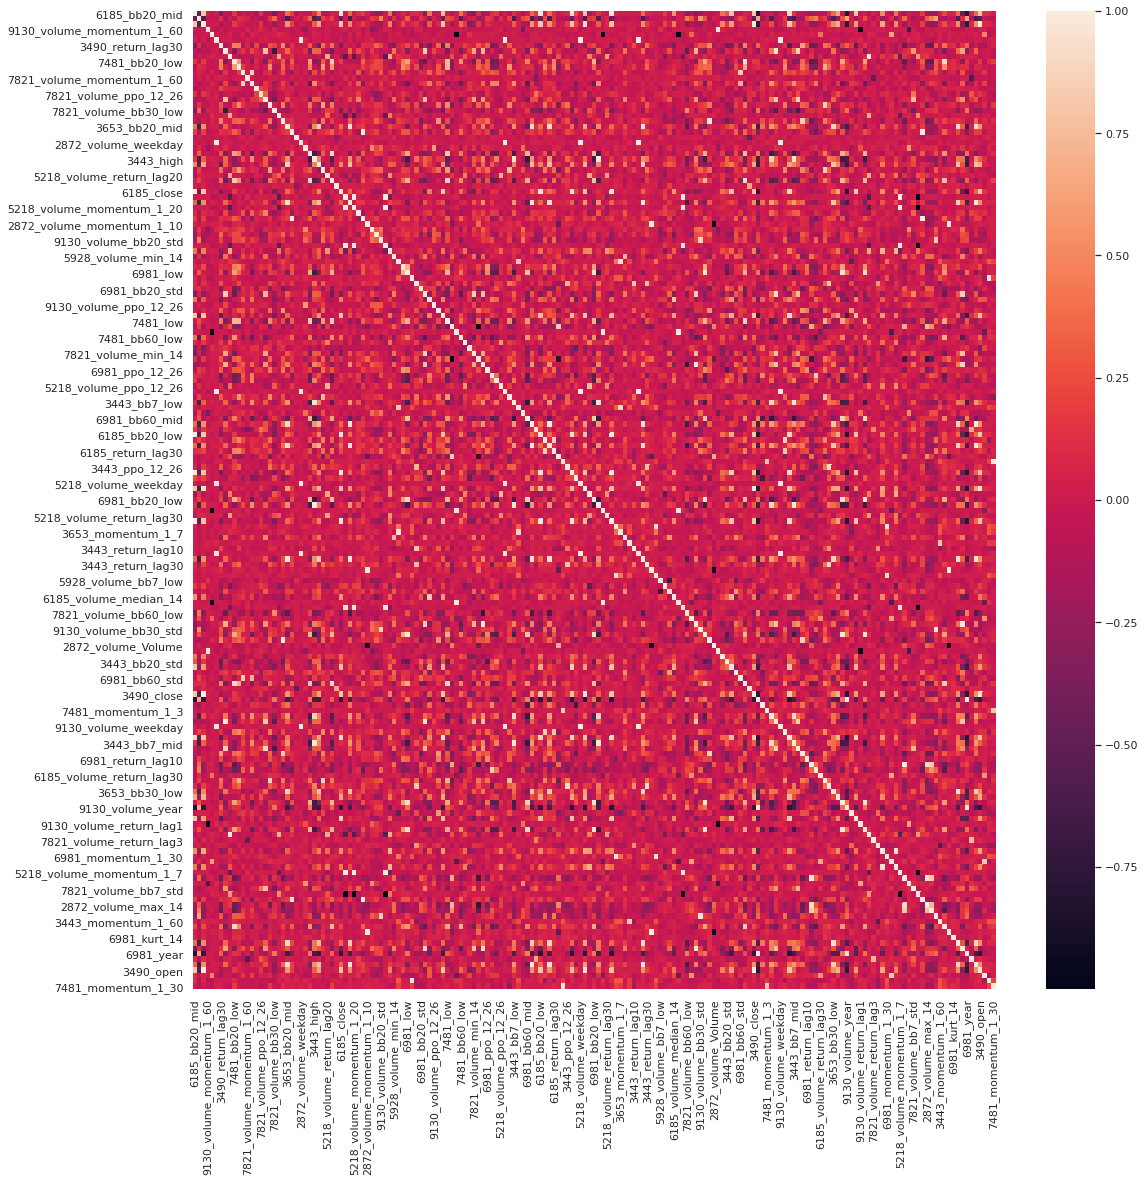

In [245]:
plt.figure(figsize=(18, 18))
sns.heatmap(corrs)

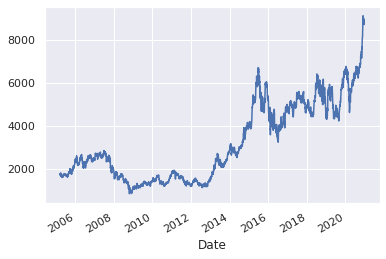

In [247]:
df_dict['6981'].Close.plot()

In [248]:
from typing import Union

import pandas as pd


def return_days(ts: Union[pd.Series, pd.DataFrame], days: int = 1):
    return (ts.shift(-days) - ts) / ts


In [249]:
TARGET_CODE = '6981'

In [250]:
sr_target = return_days(df_dict[TARGET_CODE].Close, days=3).rename('ret3d')

In [251]:
sr_target

Date
2005-03-22   -0.015602
2005-03-23    0.005298
2005-03-24   -0.003570
2005-03-25   -0.007039
2005-03-28    0.010540
                ...   
2020-12-16    0.005293
2020-12-17   -0.027066
2020-12-18         NaN
2020-12-21         NaN
2020-12-22         NaN
Name: ret3d, Length: 3857, dtype: float64

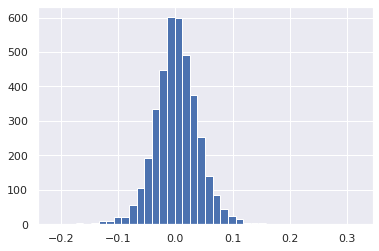

In [252]:
sr_target.hist(bins=40)

In [253]:
sr_target.dropna(inplace=True)

In [254]:
df_merged = pd.merge(df_feats, sr_target, left_index=True, right_index=True).dropna()
df_merged

,6185_bb20_mid,7481_bb60_std,3490_high,9130_volume_momentum_1_60,6185_volume_return_lag1,6185_weekday,3490_return_lag30,7821_volume_bb30_std,5218_volume_cmo_14,7481_bb20_low,7481_return_lag60,6981_atr,7821_volume_momentum_1_60,6981_natr,3653_kurt_14,7821_volume_ppo_12_26,7821_volume_max_14,7481_apo_12_26,7821_volume_bb30_low,5218_volume_return_lag3,3653_ppo_12_26,3653_bb20_mid,3490_month,5928_volume_momentum_1_3,2872_volume_weekday,9130_volume_return_lag20,7481_max_14,3443_high,3653_bb60_mid,7481_return_lag30,5218_volume_return_lag20,7481_median_14,5928_volume_return_lag7,6185_close,5218_volume_momentum_1_30,3653_bb7_high,5218_volume_momentum_1_20,7821_volume_skew_14,6185_volume_month,2872_volume_momentum_1_10,...,7481_macd,3443_macd,3653_bb30_low,5218_volume_min_14,6981_median_14,9130_volume_year,3653_return_lag3,3490_bb60_std,9130_volume_return_lag1,6981_bb20_mid,5218_volume_rsi,7821_volume_return_lag3,3443_return_lag3,5218_volume_bb7_mid,6981_momentum_1_30,6185_volume_cmo_14,5218_volume_bb7_high,5218_volume_momentum_1_7,2872_volume_bb20_mid,9130_volume_rsi,7821_volume_bb7_std,5218_volume_return_lag1,5928_volume_month,2872_volume_max_14,2872_volume_bb30_std,9130_volume_bb30_mid,3443_momentum_1_60,7481_bb30_low,2872_volume_momentum_1_3,6981_kurt_14,3653_bb20_low,7821_volume_bb60_mid,6981_year,7821_volume_cmo_14,3653_bb7_mid,3490_open,6185_volume_Volume,6185_momentum_1_60,7481_momentum_1_30,ret3d
2018-06-25,2082.375,110.144901,3525,-0.209582,-0.499431,0,-0.000703,54807.680219,2.904822,1335.333347,0.001008,0.923414,0.246849,22.337514,-0.119791,-36.033893,45600.0,-12.524551,-10540.880219,-0.001302,-10.380220,3481.80,6,-0.020960,0,-0.009059,1408.44,7618.42,3654.933333,-0.001171,0.042357,1360.315,-0.043266,2500.0,0.250909,3281.092442,0.235035,0.589603,6,0.811066,...,0.039473,2.531121,2871.911465,71644.0,5620.085,2018,-0.024046,868.861899,0.176240,5505.9165,51.452411,-0.210228,-0.009566,1.915677e+06,0.011717,-8.319224,4.812298e+06,0.501168,450.35,46.511357,13046.818394,-0.192678,6,1331.0,809.965914,8521.266667,0.036309,1339.838300,0.677414,-2.116012,2730.696652,54432.550000,2018,-9.327907,3066.571429,3440,88000,0.004793,0.019838,0.001656
2018-06-27,2176.875,109.533129,3350,0.101515,0.899306,2,0.001183,54807.654996,-1.500273,1335.999870,0.001738,1.060694,0.289534,23.971027,3.794734,-29.240637,45191.0,-11.763397,-11203.921662,-0.187536,-11.946360,3384.55,6,0.850029,2,-0.012724,1408.44,7126.91,3626.433333,0.000752,0.060049,1360.315,0.169968,2605.0,0.121111,3144.124492,0.128478,0.433272,6,-6.114990,...,0.261137,1.816754,2745.224177,71644.0,5754.290,2018,-0.005353,796.235657,-0.111190,5562.2375,49.249863,0.021385,-0.023306,1.330472e+06,-0.000363,-4.634320,2.375523e+06,-0.175140,542.45,47.461013,13241.336482,-0.068429,6,2252.0,1010.489510,7569.700000,-0.014456,1341.003038,-5.108885,-1.606531,2618.186516,53907.200000,2018,-5.492175,2988.000000,3300,109400,-0.050615,-0.003445,0.042201
2018-06-28,2229.500,108.861239,3300,-0.334805,0.914077,3,-0.001129,52869.172785,0.672428,1336.776220,0.001990,1.127809,-0.251373,24.266672,-1.524577,-21.586189,37745.0,-7.550897,-11026.872785,-0.066350,-11.885272,3341.65,6,0.500609,3,-0.012309,1409.41,7136.74,3612.216667,0.000486,0.048577,1360.315,0.066697,2640.0,-0.169281,3130.806475,-0.176563,-0.040598,6,-0.175550,...,0.424960,1.475058,2694.385692,71644.0,5796.635,2018,0.007553,773.148164,0.333797,5593.7135,50.336214,0.222351,-0.020358,1.168844e+06,-0.010098,7.507676,2.068161e+06,-0.334686,649.85,49.453603,13622.363815,0.225140,6,3377.0,1361.446396,7352.833333,0.025962,1340.380633,-0.135650,-0.965513,2580.431431,53861.283333,2018,-2.602535,2977.571429,3300,209400,-0.007627,-0.009967,0.039656
2018-06-29,2271.500,106.626532,3255,0.721799,-0.551098,4,-0.002235,51350.563179,-5.465641,1337.488998,0.002058,1.195421,-0.163599,24.294866,-1.198335,-15.667166,37745.0,-4.491218,-10837.896512,-0.180396,-11.859082,3293.75,6,-0.028992,4,-0.102162,1409.41,7107.25,3598.666667,0.000467,0.053459,1361.775,-0.066675,2535.0,0.5

In [255]:
df_feats = df_merged[df_feats.columns]
sr_target = df_merged['ret3d']

In [256]:
df_train_feats = df_feats[df_feats.index <= '2020-01-01']
df_test_feats = df_feats[df_feats.index > '2020-01-01']
sr_train_target = sr_target[sr_target.index <= '2020-01-01']
sr_test_target = sr_target[sr_target.index > '2020-01-01']

In [257]:
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler

def create_y_feat_train_dataset(df_train_X, sr_train_y, seq_len):
    xs = []
    ys = []
    for t in range(len(df_train_X)-seq_len):
        mms_x = MinMaxScaler((-0.5, 0.5))
        mms_y = MinMaxScaler((-0.5, 0.5))
        x = mms_x.fit_transform(df_train_X.iloc[t:t+seq_len, :].to_numpy().reshape(-1, len(df_train_X.columns))).reshape(seq_len, len(df_train_X.columns))
        y = mms_y.fit_transform(sr_train_y.iloc[t:t+seq_len].to_numpy().reshape(-1, 1)).flatten()
        xs.append(torch.Tensor(x).view(seq_len, len(df_train_X.columns)))
        ys.append(torch.Tensor(y).view(seq_len, 1))
    return torch.stack(xs, dim=0), torch.stack(ys, dim=0)

In [258]:
xs_train, ys_train = create_y_feat_train_dataset(df_train_feats, sr_train_target, 30)

In [259]:
xs_train.shape

torch.Size([298, 30, 181])

In [260]:
ys_train.shape

torch.Size([298, 30, 1])

In [261]:
class BILSTM(nn.Module):

    def __init__(
        self,
        input_dim: int,
        hidden_dim: int,
        output_dim: int,
        num_layers: int
    ):
        super(BILSTM, self).__init__()
        self._input_dim = input_dim
        self._hidden_dim = hidden_dim
        self._num_layers = num_layers
        self._output_dim = output_dim

        self._lstm = nn.LSTM(
            input_size=self._input_dim,
            hidden_size=self._hidden_dim,
            num_layers=self._num_layers,
            batch_first=True,
            bidirectional=True
        )

        self._linear = nn.Linear(
            self._hidden_dim*2,
            self._output_dim
        )

    def forward(self, x):
        self._lstm.flatten_parameters()
        out, hidden = self._lstm(x)
        return self._linear(out[:, :, :])

In [262]:
model = BILSTM(
    input_dim=len(df_feats.columns),
    hidden_dim=32,
    num_layers=2,
    output_dim=1
)

In [263]:
mse_loss = nn.MSELoss()
optim = torch.optim.Adam(
    params=model.parameters(),
    lr=0.005
)

In [264]:
BATCH_SIZE =16
EPOCHS = 100

In [265]:
from fastprogress import progress_bar as pb

In [266]:
loss_history = []

for n in pb(range(EPOCHS)):
    losses = []
    for t in range(xs_train.size(0) // BATCH_SIZE):
        x = xs_train[t*BATCH_SIZE:(t+1)*BATCH_SIZE, :, :]
        y = ys_train[t*BATCH_SIZE:(t+1)*BATCH_SIZE, :, :]

        out = model(x)
        loss = mse_loss(out, y)

        optim.zero_grad()
        loss.backward()
        optim.step()

        losses.append(loss.item())

    loss_history.append(sum(losses) / len(losses))

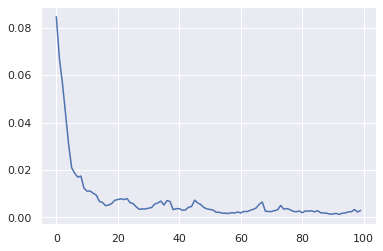

In [267]:
plt.plot(loss_history)

In [268]:
model.eval()

BILSTM(
  (_lstm): LSTM(181, 32, num_layers=2, batch_first=True, bidirectional=True)
  (_linear): Linear(in_features=64, out_features=1, bias=True)
)

In [269]:
model(xs_train).shape

torch.Size([298, 30, 1])

In [270]:
preds = model(xs_train)[:, -1, :].detach().numpy().flatten()

In [271]:
preds.shape

(298,)

In [272]:
ys_train[:, -1, :].detach().numpy().flatten().shape

(298,)

In [273]:
df_train_preds = pd.DataFrame({
    'actual': ys_train[:, -1, :].detach().numpy().flatten(),
    'pred': preds
})

In [274]:
df_train_preds

,actual,pred
0,-0.494546,-0.422095
1,-0.500000,-0.512763
2,-0.267067,-0.271409
3,-0.176160,-0.152718
4,0.040255,-0.039239
...,...,...
293,0.162001,-0.021057
294,0.119839,-0.162676
295,0.063001,-0.218653
296,-0.228353,-0.205650


<Figure size 1296x576 with 0 Axes>

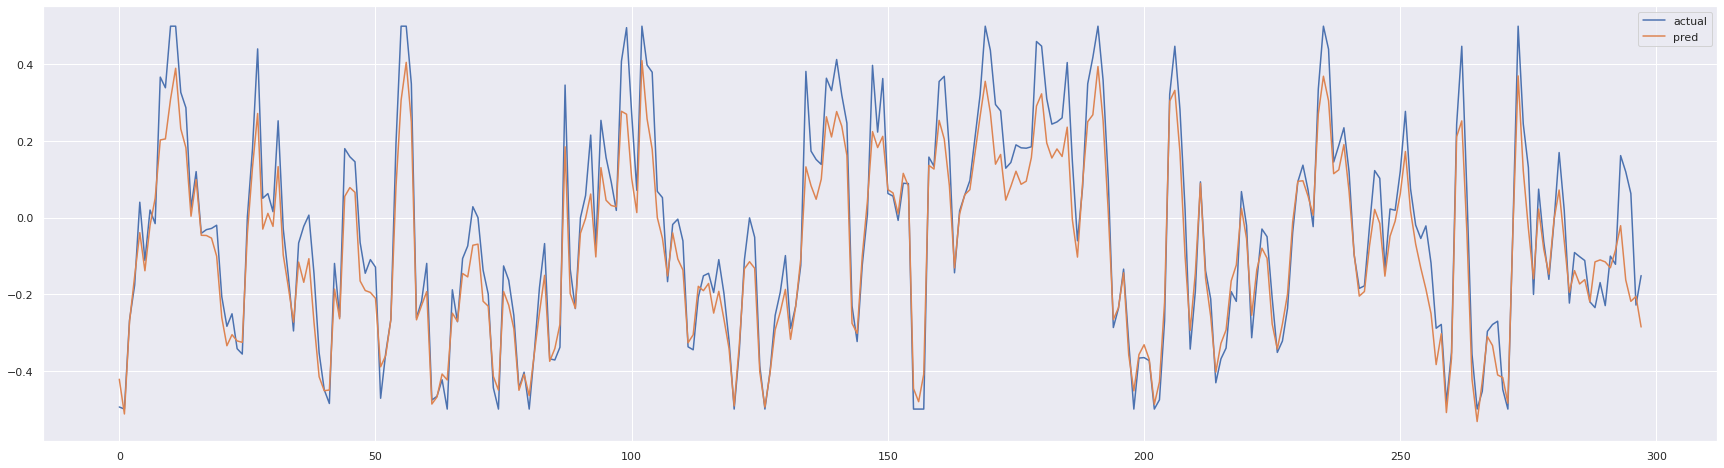

In [275]:
plt.figure(figsize=(18, 8))
df_train_preds.plot(figsize=(30, 8))

In [276]:
train_pct_err = (df_train_preds['actual'] - df_train_preds['pred']) / df_train_preds['actual']

In [277]:
train_pct_err

0      0.146501
1     -0.025527
2     -0.016256
3      0.133071
4      1.974752
         ...   
293    1.129980
294    2.357455
295    4.470606
296    0.099418
297   -0.885737
Length: 298, dtype: float32

(-4.0, 4.0)

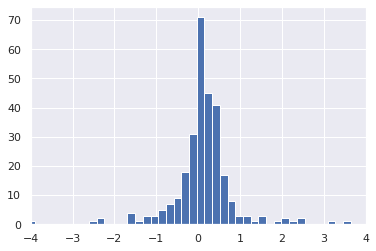

In [278]:
train_pct_err.hist(bins=5000)
plt.xlim(-4, 4)

In [279]:
train_pct_err.abs().mean()

4.253808975219727

In [280]:
train_pct_err.abs().median()

0.2955634593963623

In [281]:
(df_train_preds['actual'] * df_train_preds['pred']) > 0 

0       True
1       True
2       True
3       True
4      False
       ...  
293    False
294    False
295    False
296     True
297     True
Length: 298, dtype: bool

In [282]:
# bininary classification train accuracy 
((df_train_preds['actual'] * df_train_preds['pred']) > 0 ).sum() / len(df_train_preds['actual'])

0.9194630872483222

In [283]:
xs_test, ys_test = create_y_feat_train_dataset(df_test_feats, sr_test_target, 30)

In [284]:
preds = model(xs_test)[:, -1, :].detach().numpy().flatten()

In [285]:
preds.shape

(148,)

In [286]:
ys_test.shape

torch.Size([148, 30, 1])

In [287]:
df_test_preds = pd.DataFrame({
    'actual': ys_test[:, -1, :].detach().numpy().flatten(),
    'pred': preds
})

In [288]:
df_test_preds

,actual,pred
0,0.131239,0.083269
1,0.032660,0.045704
2,-0.089026,-0.020903
3,-0.435535,-0.105448
4,-0.319815,0.083405
...,...,...
143,-0.313490,-0.167979
144,-0.488942,-0.145093
145,-0.184634,0.005508
146,-0.112620,0.148819


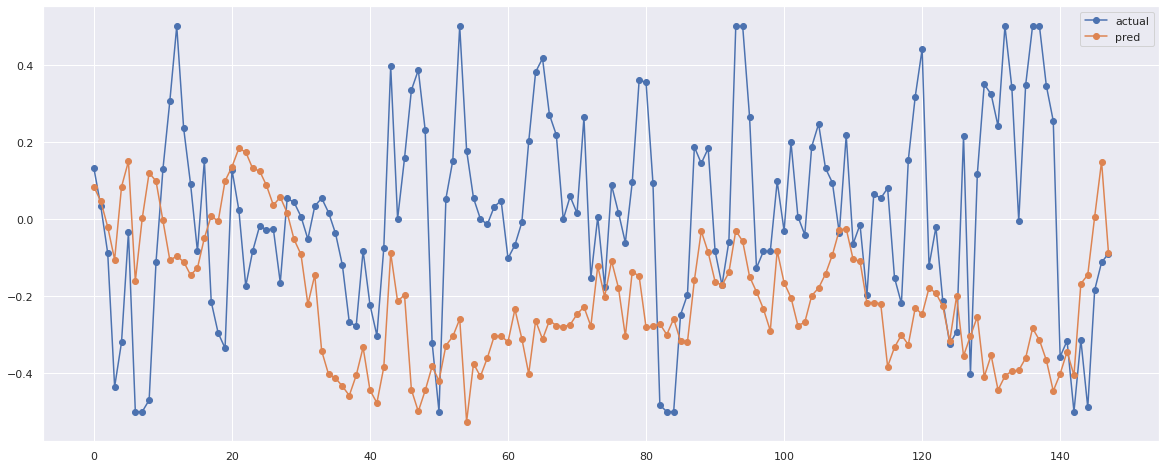

In [289]:
df_test_preds.plot(figsize=(20, 8), marker='o')

In [290]:
test_pct_err = (df_test_preds['actual'] - df_test_preds['pred']) / df_test_preds['actual']

(-10.0, 10.0)

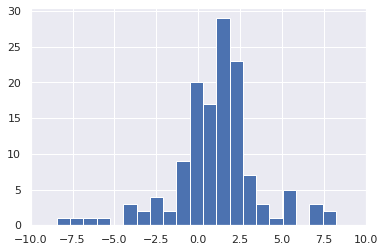

In [292]:
test_pct_err.hist(bins=5000)
plt.xlim(-10, 10)

In [293]:
test_pct_err.abs().mean()

32.34941101074219

In [294]:
test_pct_err.abs().median()

1.8502616882324219

In [295]:
# bininary classification test accuracy 
((df_test_preds['actual'] * df_test_preds['pred']) > 0 ).sum() / len(df_test_preds['actual'])

0.4189189189189189